***AI & ML Project - MNIST handwritten dataset:***


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#loading the libraries for my model 
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adamax, Adadelta , Adagrad, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [72]:
#Loading Dataset
#The MNIST dataset is available in the TensorFlow 
(X_train, y_train) , (X_test, y_test) = mnist.load_data() 

In [ ]:
#Basic Exploratory Data Analysis (EDA)
#checking total number of data points

print("A total of ", len(X_train), "train dataset images") 
print("A total of ", len(X_test), "test dataset images") 
#to check the shape of the dataset. 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#output example of training set #2920 how it looks like
X_train[2920]

In [ ]:
#using false colors to visualize the array image
plt.imshow(X_train[2920])

In [ ]:
#output row #10 of example #2920
X_train[2920][10]

In [ ]:
#output pixel #16 of row #10 of example #2920
X_train[2920][10][15]

In [49]:
# Our dataset scale.
X_train[0].min(), X_train[0].max()

(0, 255)

In [74]:
#Training pixels to 0-1 range
X_train = (X_train - 0) / (255 - 0)
X_test = (X_test - 0) / (255 - 0)

X_train[0].min(), X_train[0].max()


(0.0, 1.0)

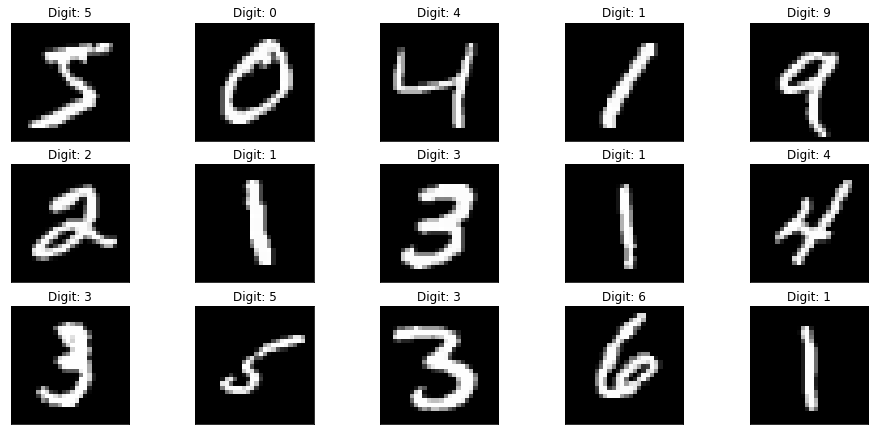

In [75]:
#We can now plot the first 20 images on the train set:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(15):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [76]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [ ]:
y_train[0:20]

In [77]:
#initialize the model
model = Sequential([
                    
#Block1
#2 convolutional layers with 64 filters each, of size 3 x3 each, 
Conv2D(64, (3, 3), activation= 'relu', padding='same', name='block1_conv1', input_shape=(28, 28, 1)),
Conv2D(64, (3, 3), activation= 'relu', padding='same', name='block1_conv2'),
MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'),
#Block2
#2 convolutional layers, each with 128 filters, of size 3 x3 each, 
Conv2D(128, (3, 3), activation= 'relu', padding='same', name='block2_conv1'),
Conv2D(128, (3, 3), activation= 'relu', padding='same', name='block2_conv2'),
MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'),
#Block3
#3 convolutional layers each with 256 filters, of size 3 x3 each.
Conv2D(256, (3, 3), activation= 'relu', padding='same', name='block3_conv1'),
Conv2D(256, (3, 3), activation= 'relu', padding='same', name='block3_conv2'),
Conv2D(256, (3, 3), activation= 'relu', padding='same', name='block3_conv3'),
MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'),  
#Block4 
#3 convolutional layers each with 512 filters, of size 3 x3 each.
Conv2D(512, (3, 3), activation= 'relu', padding='same', name='block4_conv1'),
Conv2D(512, (3, 3), activation= 'relu', padding='same', name='block4_conv2'),
Conv2D(512, (3, 3), activation= 'relu', padding='same', name='block4_conv3'),
MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'),   
#Dropout layer as a regularization strategy to avoid overfitting.    
#Dropout(0.2),
#Flatten layer to reduce dimensions to binary vector. 
Flatten(),
#1st hidden layer of 100 neurons to get all relevant data
Dense(100, activation="relu"),
#Output layer with 10 neurons and softmax activation function 
Dense(10, activation="softmax")
])

In [ ]:
#Compiling the model 
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

In [79]:
#Training the model
hist = model.fit(X_train, y_train, epochs= 10 , batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.4591 - accuracy: 0.8405 - val_loss: 0.0654 - val_accuracy: 0.9808
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0552 - val_accuracy: 0.9834
Epoch 3/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0373 - val_accuracy: 0.9891
Epoch 4/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 5/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0414 - val_accuracy: 0.9894
Epoch 6/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0378 - val_accuracy: 0.9914
Epoch 7/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0351 -

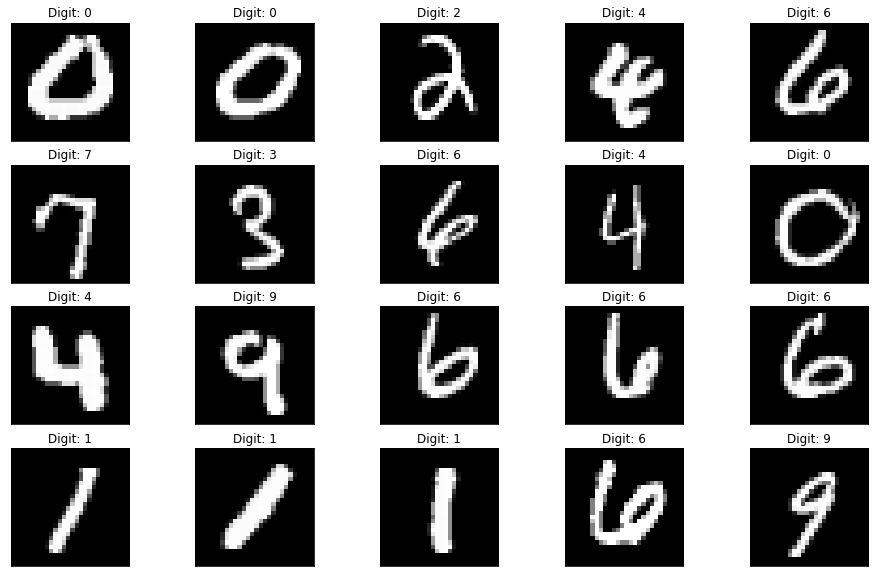

In [80]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()

In [ ]:
history=history_dict
print(history.keys())


In [ ]:
#accuracy = history['accuracy']
#val_accuracy = history['val_accuracy']
#loss = history_dict['loss']
#val_loss = history_dict['val_loss']

In [81]:
score=model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.03293120861053467
accuracy= 0.9919999837875366


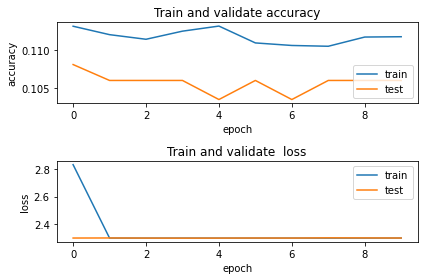

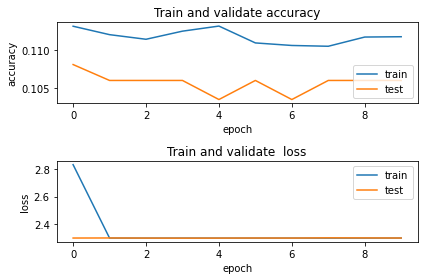

In [ ]:
#import os
# plotting the metrics of 
history=hist.history
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Train and validate accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Train and validate  loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [60]:
#predicting the model
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

0.9901

In [ ]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    0,    1,    1,    0,    1,    2,    0],
       [   0, 1128,    2,    1,    1,    1,    1,    0,    1,    0],
       [   1,    0, 1028,    0,    0,    0,    0,    1,    1,    1],
       [   0,    0,    2,  997,    0,    5,    0,    0,    4,    2],
       [   0,    0,    0,    0,  980,    0,    0,    0,    1,    1],
       [   1,    0,    0,    4,    1,  883,    1,    0,    0,    2],
       [   3,    2,    0,    1,    6,    5,  940,    0,    1,    0],
       [   0,    2,    7,    1,    0,    0,    0, 1013,    1,    4],
       [   2,    0,    0,    2,    2,    1,    0,    0,  965,    2],
       [   1,    3,    0,    1,   10,    2,    0,    2,    0,  990]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

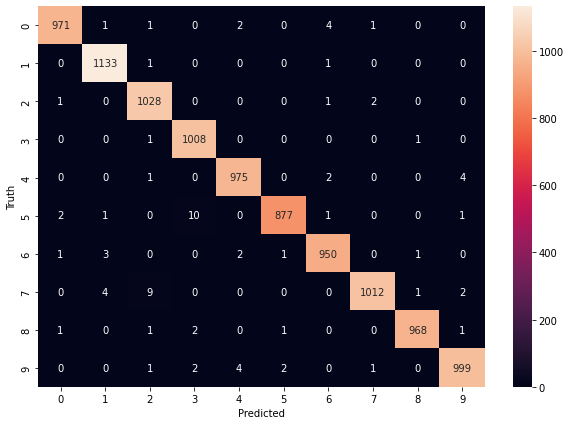

In [ ]:
#using seaborn to visualize confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

All other Tests were made by Tuning Hyper parameters and conclusions made. 